## 토픽 모델링
- 구조화되지 않은 방대한 문헌집단에서 주제를 찾아내기 위한 알고리즘
- 맥락과 관련된 단서들을 이용하여 의미를 가진 단어들을 클러스터링하여 주제를 추론하는 모델
- 감성 분석, 소셜 네트워크 분석 등의 타 분석모델과도 혼합하여 자주 쓰임

### LDA(Latent Dirichlet Allocation)
- 단어 교환성 가정
  - 교환성은 단어들의 순서는 상관하지 않고 오로지 단어들의 유무만이 중요하다는 가정
    - 단어들의 순서를 무시할 경우 문서는 단순히 그 안에 포하하는 단어들의 빈도수만을 가지고 표현할 수 있음
- 각각의 문서는 여러 개의 주제를 가지고 있음
  - [빅데이터, 알고리즘, AI, IoT] -> 데이터 사이언스에 관련된 내용
  - [셰익스피어, 톨스토이, 파우스트] -> 문학과 관련된 내용
- 자세한 내용은 다음 논문을 참고
  - Blei, D. M., Ng, A. Y., & Jordan, M. I. (2003). Latent Dirichlet Allocation. Journal of Machine Learning Research, 3(Jan), 993-1022.
- pip install gensim

In [1]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('[\w]+')
stop_words = stopwords.words('english')
p_stemmer = PorterStemmer()

In [2]:
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health."
doc_f = "Big data is a term used to refer to data sets that are too large or complex for traditional data-processing application software to adequately deal with."
doc_g = "Data with many cases offer greater statistical power, while data with higher complexity may lead to a higher false discovery rate."
doc_h = "Big data was originally associated with three key concepts: volume, variety, and velocity."
doc_i = "A 2016 definition states that 'Big data represents the information assets characterized by such a high volume, velocity and variety to require specific technology and analytical methods for its transformation into value'."
doc_j = "Data must be processed with advanced tools to reveal meaningful information."

In [3]:
doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e, doc_f, doc_g, doc_h, doc_i, doc_j]
texts = []

# 문서별 단어 넣기(소문자화, 토크나이징, 불용어 제거, 어근추출)
for w in doc_set:
    raw = w.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in stop_words]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)

In [5]:
# 문서의 단어들을 사전형(단어토큰:ID)으로 변경
dictionary = corpora.Dictionary(texts)
# 앞 10개의 단어토큰 결과 보기
dict(list(dictionary.token2id.items())[0:10])

{'brocolli': 0,
 'brother': 1,
 'eat': 2,
 'good': 3,
 'like': 4,
 'mother': 5,
 'around': 6,
 'basebal': 7,
 'drive': 8,
 'lot': 9}

In [6]:
# 문서-단어 매트릭스 형성 (bow: bag-of-words)
# 문서를 단어토큰의 ID와 빈도수로 수치화
corpus = [dictionary.doc2bow(text) for text in texts]
# (단어토큰의 ID, 해당 문서에 발생한 빈도수) 앞 3개 문서 결과 보기
corpus[0:3]

[[(0, 2), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1)],
 [(1, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(8, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1)]]

In [7]:
# LDA 모형(토픽개수: 3)
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary)

# 토픽별 단어들 출력(토픽별 출력단어들 개수: 5개)
# 단어 옆의 숫자는 가중치(각 토픽에서 해당 단어가 설명하는 비중) 의미
ldamodel.print_topics(num_words=5)

[(0,
  '0.069*"data" + 0.025*"complex" + 0.025*"big" + 0.025*"higher" + 0.024*"health"'),
 (1,
  '0.039*"data" + 0.032*"inform" + 0.032*"process" + 0.032*"advanc" + 0.032*"tool"'),
 (2,
  '0.041*"mother" + 0.040*"brother" + 0.039*"drive" + 0.033*"good" + 0.033*"brocolli"')]

In [15]:
# 문서별 토픽 분포(i번째 문서에 토픽 0~2의 분포)
# 모든 토픽의 분포 확률의 합은 1
for i in range(len(texts)):
    print(ldamodel.get_document_topics(corpus)[i])

[(0, 0.03423952), (1, 0.033674233), (2, 0.9320862)]
[(0, 0.0340518), (1, 0.033765364), (2, 0.93218285)]
[(0, 0.031582706), (1, 0.03076919), (2, 0.93764806)]
[(0, 0.027355487), (1, 0.026097974), (2, 0.94654655)]
[(0, 0.8557131), (1, 0.049259424), (2, 0.0950274)]
[(0, 0.95953655), (1, 0.020552335), (2, 0.01991113)]
[(0, 0.9597657), (1, 0.02018734), (2, 0.02004706)]
[(0, 0.04305317), (1, 0.037637208), (2, 0.9193097)]
[(0, 0.9667063), (1, 0.016811946), (2, 0.016481789)]
[(0, 0.039611526), (1, 0.922948), (2, 0.037440527)]


### LDA 토픽 개수 지정
- 대량의 문서에서 가장 적절한 토픽의 개수를 넣어야 모델의 결과를 신뢰할 수 있음
- 사전에 가장 적절한 토픽 개수를 알고 있거나 또는 사전에 미리 분류해야 할 개수를 알고 있으면 그 개수로 지정해주면 됨
- 하지만 대부분의 연구에서 이러한 사전정보를 갖고 있지 않아 통계적 방법으로 최적의 토픽 개수를 구함
- 토픽 개수 구하는 통계적 방법
  - perplexity
    - 사전적 의미: 당혹, 혼란, 곤혹
    - 혼란도
    - 특정 확률모델이 실제로 관측되는 값을 얼마나 잘 예측하는지 평가할 때 사용
    - 토픽 개수를 늘릴수록 perplexity는 감소하는 경향을 보임
    - 특정 토픽 개수 지점을 지나면 더 이상 perplexity는 감소하지 않고 수렴하는 지점이 등장하는데 이 때의 perplexity가 해당 모델의 최종 perplexity로 봄
    - perplexity가 작으면 작을수록 해당 토픽 모델은 실제 문헌 결과를  잘 반영한다는 뜻이므로 학습이 잘 되었다고 평가할 수 있음
  - topic coherence
    - 실제로 사람이 해석하기에 적합한 평가 척도를 만들기 위해서 제시된 척도
    - 우선 토픽 모델링 결과로 나온 주제들에 대해 각각의 주제에서 상위 N개의 단어를 뽑음
    - 모델링이 잘 되었을수록 한 주제 안에서 의미론적으로 유사한 단어가 많이 모여있게 마련임
    - 따라서 상위 단어 간의 유사도를 계산하여 평균을 구하면 실제로 해당 주제가 의미론적으로 일치하는 단어들끼리 모여있는지 알 수 있음  

In [16]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))
# toppn: 상위 N개의 단어를 이용하여 유사도를 계산하라는 의미
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, topn=10)
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.043575742635234

Coherence Score:  0.43936379168979417


In [17]:
import matplotlib.pyplot as plt

# 토픽의 개수를 달리하며 perplexity 지표 변화를 보여줌
perplexity_values = []
for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

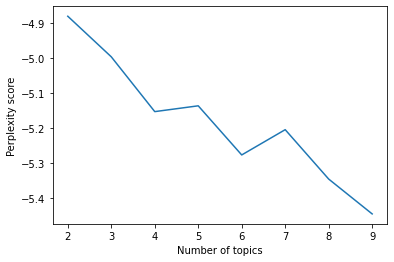

In [18]:
x = range(2, 10)
plt.plot(x, perplexity_values)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.show()

In [19]:
# 토픽의 개수를 달리하며 topic coherence 지표 변화를 보여줌
coherence_values = []
for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

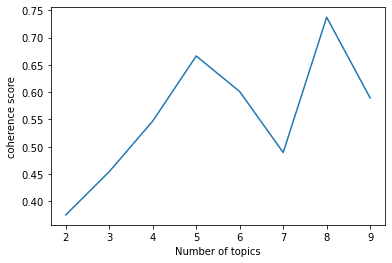

In [20]:
x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("coherence score")
plt.show()